## <center> Indian Food
Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. 
We have the information about various Indian dishes, their ingredients, their place of origin, etc
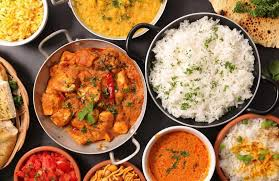

## Column Description

name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

Presence of -1 in any of the columns indicates NaN value.



In [ ]:
#importing all the necessary libraries

#for mathematical operations
import numpy as np

#for data manipulation
import pandas as pd

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#for data profiling
import pandas_profiling

In [ ]:
#Reading the dataset
data = pd.read_csv('../input/indian-food-101/indian_food.csv')

In [ ]:
#Checking the head of the data
data.head()

In [ ]:
#Checking the tail of the data
data.tail()

In [ ]:
#Checking the shape of the dataset
data.shape
print("There are {0} rows and {1} columns in the dataset".format(data.shape[0],data.shape[1]))

In [ ]:
#Replacing all the -1 values in the categorical and numerical columns with nan 
data= data.replace('-1',np.nan)
data = data.replace(-1,np.nan)

In [ ]:
#complete report of the data
pandas_profiling.ProfileReport(data)

**Pandas profiling** is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable.

We got the quick review of the data with just one line of code.
Pandas Profiling Report contains 6 segements
1. **Overview**:- Where you get the dataset statistics and variable types
2. **Variables**:- Here you get the complete detail of each and every variable like the number of unique values, missing values, data type, cardinality and distribution plot. While you click on Toggle details, you get the common values, length, characters in the variable.
3. **Interactions**:- Under this part, you can see the scatter plot between any two continuous variables.
4. **Correlations**:- Under this part, you get the four type of correlation between continuous variables and you can even see the details of any particular type of correlation by clicking on Toggle correlation descriptions.
5. **Missing Values**:- Under this part, you get to know the missing values in differnet variables.
6. **Sample**:- Here to get the first five and last five rows of the datset

In [ ]:
data['diet'].value_counts()

In [ ]:
data['course'].value_counts()

In [ ]:
data['flavor_profile'].value_counts()

In [ ]:
data['state'].value_counts()

### First of all, we are going to take out some insights from the categorical variables.
So, first, lets check only the categorical variables of the dataset using select_dtypes function

In [ ]:
#Checking the head of only categorical variables
data.select_dtypes('object').head()

#### Now lets check the distribution of Veg vs Non Veg dishes with the help of pie chart and count plot.
We can observe that there are more number of veg dishes than the non-veg dishes.

In [ ]:
#Setting the style and background of plots
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('fivethirtyeight')

#Countplot of Veg/Non-Veg
plt.subplot(1,2,1)
sns.countplot(data['diet'])
plt.title("Count Plot of Veg/Non-Veg")

#Piechart for Veg/NonVeg
plt.subplot(1,2,2)
x = data['diet'].value_counts()
explode = [0.1,0]
labels = ['Veg','Non-veg']
plt.pie(x,explode=explode,labels=labels, autopct = '%.2f%%')
plt.title("Pie Chart showing the distribution of Veg/Non-Veg")
plt.show()

It can be infer that there are more Vegetarian dishes than Non-Vegetarian.
About 89% dishes are vegetarian and about 11% dishes are non vegetarian.

#### Now lets check for the count of different flavoured dishes.

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('fivethirtyeight')

#Count plot of different flavours of dishes
sns.countplot(data['flavor_profile'])
plt.title("Count Plot of flavours")

1. Maximum dishes are spicy in flavour.
2. Bitter and sour flavour dishes are almost negligible in numbers comaprison to Spicy and Sweet flavour dishes.

#### Now, checking the count of different courses of meal like starter, main-course etc

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('fivethirtyeight')

#Countplot of dish courses
sns.countplot(data['course'])
plt.title("Count Plot of course")

1. Maximum dishes are of main course.
2. Least dishes are for starter.

In [ ]:
plt.rcParams['figure.figsize'] = (18,6)
plt.style.use('fivethirtyeight')

#Countplot of states
sns.countplot(data['state'])
plt.title("Count Plot of state")
plt.xticks(rotation=90)
plt.show()

Maximum number of dishes are from Gujarat, Punjab and Maharashtra.

## Top 6 states with maximum number of dishes.

In [ ]:
a = data['state'].value_counts().reset_index()
a.sort_values(by='state',ascending=False).head(6).style.background_gradient(cmap='copper')

### Number of dishes Region Wise

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('fivethirtyeight')

#Countplot of region
sns.countplot(data['region'])
plt.title("Count Plot of region")

West Region has maximum number of dishes.

In [ ]:
#Checking only the numerical columns of the dataset
data.select_dtypes('number').head()

In [ ]:
#Area plot of column "preparation time"
data['prep_time'].plot(kind='area',color='brown')

In [ ]:
#area plot of column "cooking time"
data['cook_time'].plot(kind='area')

In [ ]:
sns.boxenplot(data['cook_time'], orient = 'v')

## Bivariate Analysis

In [ ]:
sns.countplot(data['diet'],hue=data['flavor_profile'])
plt.title("Count of Veg/Non-Veg based on flavor")
plt.show()

1. Non Vegetarian dishes are spicy in flavour.
2. Vegetarian dishes are available in all flavours.

In [ ]:
#Crosstab of flavour and course of the dishes
x = pd.crosstab(data['flavor_profile'],data['course']).style.background_gradient(cmap='copper')
x

We can infer the following:-
1. There are three dishes which are sweet but not come under dessert course.
2. There is only 1 sour flavored dish which comes in main course.
3. We have only two starter dishes.
4. Dishes in main course comes in all the four flavors i.e., bitter, sour, spicy and sweet.

In [ ]:
y = pd.crosstab(data['course'],data['diet'])
y.style.bar(color=['gold'])

1. Thw only two starter dishes which we have are non-veg.
2. All the snacks and dessert dishes are veg.
3. Main course has both veg and non veg dishes.

In [ ]:
data[['course','prep_time']].sort_values(by='prep_time',ascending=False).reset_index().head()

We can infer that main course takes highest time for preparation.

In [ ]:
display(data[['flavor_profile','prep_time']].groupby(['flavor_profile']).agg(['max','mean','min']))

#Plotting the same
x= data[['flavor_profile','prep_time']].groupby(['flavor_profile']).agg(['max','mean','min'])
x.plot(kind='line')
plt.legend()
plt.show()

We can observe that Spicy flavour dishes take maximum preparation time while sour dishes comes last.

In [ ]:
#Total time taken to serve a dish can be calculated by adding the cook time and prep time.
data['total_time'] = data['prep_time']+data['cook_time']

x = data.loc[data.groupby(['course'])['total_time'].idxmax()][['total_time','course']]
x

In [ ]:
display(data[['total_time','course']].groupby(['course']).agg(['max','min']))

#Lets plot this
data[['total_time','course']].groupby(['course']).agg(['max','min']).plot(kind='line', color=['red','blue'])
plt.title("Which course takes maximum time to be served?", fontsize=20)
plt.ylabel("Time",fontsize=15)
plt.show()

In [ ]:
pd.crosstab(data['region'], data['diet']).style.bar(color='gold')

We can observe that 
1. "Central Region" has no Non veg dishes.
2. "North East" Region has almost equal number of Veg and Non Veg dishes.
3. "West" region has highest number of Veg dishes.

In [ ]:
#Number of Veg and Non veg dishes in different states of the country.
pd.crosstab(data['state'], data['diet']).style.bar(color='gold')

In [ ]:
pd.crosstab(data['state'], data['diet']).plot()
plt.show()

### State with its dishes

In [ ]:
#Defining a function which displays all the dishes names for a particular state
def state_dish(x):
    return data[data['state']==x][['name','diet','flavor_profile']]

In [ ]:
state_dish('Gujarat')

In [ ]:
state_dish('Maharashtra')

## Regions with its dishes

In [ ]:
#Defining a function which displays all the dishes of a particular region
def region_dish(x):
    return data[data['region']==x][['name','diet','flavor_profile','state']]

In [ ]:
region_dish('Central')